In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
real_news=pd.read_csv("./True.csv")
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_news=pd.read_csv("./Fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# length of real and fake news 
real_news['text_length']=real_news['text'].str.len()

In [6]:
real_news.head()

,title,text,subject,date,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204


In [7]:
fake_news['text_length']=fake_news['text'].str.len()
fake_news.head()

,title,text,subject,date,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",2346


Text(0.5, 1.0, 'Distribution of article length')

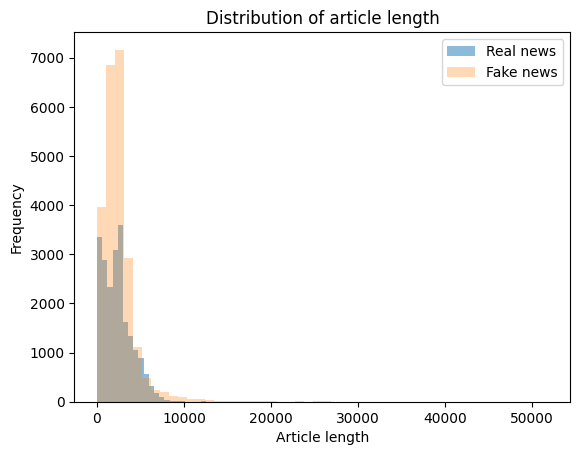

In [8]:
plt.hist(real_news['text_length'],label='Real news',bins=50,alpha=0.5)
plt.hist(fake_news['text_length'],label='Fake news',bins=50,alpha=0.3)
plt.legend()
plt.xlabel("Article length")
plt.ylabel("Frequency")
plt.title("Distribution of article length")

### Text Preprocessing
- Lowercasing the text
- Removing punctuation and digits
- Removing stop words
- Stemming or lemmatizing the text

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
import string

In [10]:
import nltk
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt_tab')
# The punkt_tab resource in NLTK is a replacement for the older punkt tokenizer model.

[nltk_data] Downloading package wordnet to C:\Users\Anand
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anand
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Anand
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
stop_words=set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [13]:
def preprocess_text(text):
    # lowercase the text
    text=text.lower()
    # removing punctuations and digits
    text=text.translate(str.maketrans('','',string.punctuation+string.digits))

    # tokenize the text
    words=word_tokenize(text)
    # remove stop words
    words=[word for word in words if word not in stop_words]
    # stem or lemmatize the words 
    words=[stemmer.stem(word) for word in words]
    # join the words back into a string
    text=' '.join(words)
    return text

In [14]:
real_news['text']=real_news['text'].apply(preprocess_text)

In [15]:
real_news[['text']].head()

,text
0,washington reuter head conserv republican fact...
1,washington reuter transgend peopl allow first ...
2,washington reuter special counsel investig lin...
3,washington reuter trump campaign advis georg p...
4,seattlewashington reuter presid donald trump c...


In [16]:
fake_news['text']=fake_news['text'].apply(preprocess_text)

In [17]:
fake_news[['text']].head()

,text
0,donald trump wish american happi new year leav...
1,hous intellig committe chairman devin nune go ...
2,friday reveal former milwauke sheriff david cl...
3,christma day donald trump announc would back w...
4,pope franci use annual christma day messag reb...


## Model Training

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

In [19]:
%pip install scipy.spare

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipy.spare (from versions: none)
ERROR: No matching distribution found for scipy.spare


In [20]:
vectorizer=CountVectorizer()
X_real=vectorizer.fit_transform(real_news['text'])
X_fake=vectorizer.transform(fake_news['text'])

In [21]:
#  displaying vocabulary
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aab', ..., 'zyri', 'zyuganov', 'émigré'],
      shape=(57521,), dtype=object)

In [22]:
len(vectorizer.get_feature_names_out())

57521

In [23]:
X_real,X_fake

(<Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 3172252 stored elements and shape (21417, 57521)>,
 <Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 3361646 stored elements and shape (23481, 57521)>)

In [24]:
X=sp.vstack([X_real,X_fake])
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6533898 stored elements and shape (44898, 57521)>

In [25]:
y=np.concatenate([np.ones(X_real.shape[0]),np.zeros(X_fake.shape[0])])

# real news ---> 1
# fake news ----> 0

In [26]:
y

array([1., 1., 1., ..., 0., 0., 0.], shape=(44898,))

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

### Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.994988864142539
Precision: 0.9940050726308508
Recall: 0.9956120092378753
F1 Score: 0.9948078920041536
